<a href="https://colab.research.google.com/github/wassanchez/DS_Wilson/blob/main/DataCovid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import os
import numpy as np
import pandas as pd
# Librería para medidas de posición y forma
import scipy
import scipy.stats as stats
# Librerías para visualización
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly
import missingno as msg

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IBERO/covid_19_indonesia_time_series_all.csv')
data

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.00,1.00
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31817,9/15/2022,ID-SA,Sulawesi Utara,37,0,0,37,52770,1213,50997,...,1.259638,14.01,19974.38,0.0,459.14,45.91,2.30%,96.64%,2.85,1.00
31818,9/15/2022,ID-SB,Sumatera Barat,13,0,3,10,104640,2371,102066,...,-0.850253,2.36,18959.11,0.0,429.59,42.96,2.27%,97.54%,6.50,1.00
31819,9/15/2022,ID-SS,Sumatera Selatan,16,0,1,15,82198,3376,78510,...,-3.216212,1.95,10002.74,0.0,410.83,41.08,4.11%,95.51%,3.20,1.00
31820,9/15/2022,ID-SU,Sumatera Utara,50,0,5,45,158866,3288,154924,...,2.191894,3.36,10680.15,0.0,221.04,22.10,2.07%,97.52%,1.92,1.00


In [3]:
data.describe()

,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,City or Regency,Total Regencies,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Growth Factor of New Cases,Growth Factor of New Deaths
count,31822.000000,31822.000000,31822.000000,31822.000000,3.182200e+04,31822.000000,3.182200e+04,31822.000000,0.0,31822.000000,...,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,31822.000000,29883.000000,28375.000000
mean,402.311388,9.920652,390.398498,1.992238,1.594500e+05,4564.753221,1.492615e+05,5623.782415,NaN,24.027277,...,738.894928,113.700478,-2.725681,28.133292,11485.038800,0.640308,289.633640,28.963329,1.326795,1.033834
std,2320.629838,64.139080,2199.878802,1219.513355,6.264435e+05,17693.731369,5.958536e+05,28537.412305,NaN,68.359734,...,2729.431626,9.862068,3.608065,74.309710,16477.385479,1.933016,363.428724,36.342881,2.679379,1.351755
min,0.000000,0.000000,0.000000,-29938.000000,1.000000e+00,0.000000,0.000000e+00,-2343.000000,NaN,1.000000,...,8.590000,96.910522,-8.682205,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,2.000000,-12.000000,5.223250e+03,128.000000,3.913500e+03,80.000000,NaN,7.000000,...,47.790000,106.109004,-6.204699,0.830000,1291.367500,0.000000,38.862500,3.890000,0.650000,0.750000
50%,27.000000,0.000000,20.000000,0.000000,2.359650e+04,565.500000,2.102750e+04,557.000000,NaN,11.000000,...,103.840000,113.417654,-2.461746,5.710000,6804.285000,0.000000,158.415000,15.840000,1.000000,1.000000
75%,130.000000,3.000000,123.000000,19.000000,6.992775e+04,2189.000000,6.414200e+04,2279.000000,NaN,18.000000,...,262.700000,121.201093,0.212037,22.290000,14557.360000,0.540000,389.910000,38.990000,1.310000,1.000000
max,64718.000000,2069.000000,61361.000000,39165.000000,6.405044e+06,157876.000000,6.218708e+06,586113.000000,NaN,416.000000,...,16334.310000,138.696030,4.225615,1459.040000,130231.620000,63.800000,1632.600000,163.260000,175.000000,134.500000


In [5]:
data['New Cases'].quantile(np.arange(0.75,1,0.01))



0.75     130.00
0.76     140.00
0.77     150.00
0.78     163.00
0.79     176.00
0.80     191.00
0.81     208.00
0.82     228.00
0.83     250.00
0.84     274.00
0.85     300.00
0.86     330.00
0.87     369.00
0.88     416.00
0.89     477.00
0.90     547.00
0.91     635.11
0.92     740.32
0.93     887.53
0.94    1050.74
0.95    1309.85
0.96    1731.64
0.97    2591.40
0.98    4190.74
0.99    6836.85
Name: New Cases, dtype: float64

In [6]:
nuevos_casos = data['New Cases']
Q1 = nuevos_casos.quantile(0.25)
Q3 = nuevos_casos.quantile(0.75)
print("Q1 = ", Q1, " Q3 = ", Q3)

Q1 =  3.0  Q3 =  130.0


In [7]:
IQR = Q3 - Q1
IQR

127.0

In [8]:
print('limite inferior', Q1 - (1.5*IQR))
print('limite superior', Q3 + (1.5*IQR))

limite inferior -187.5
limite superior 320.5


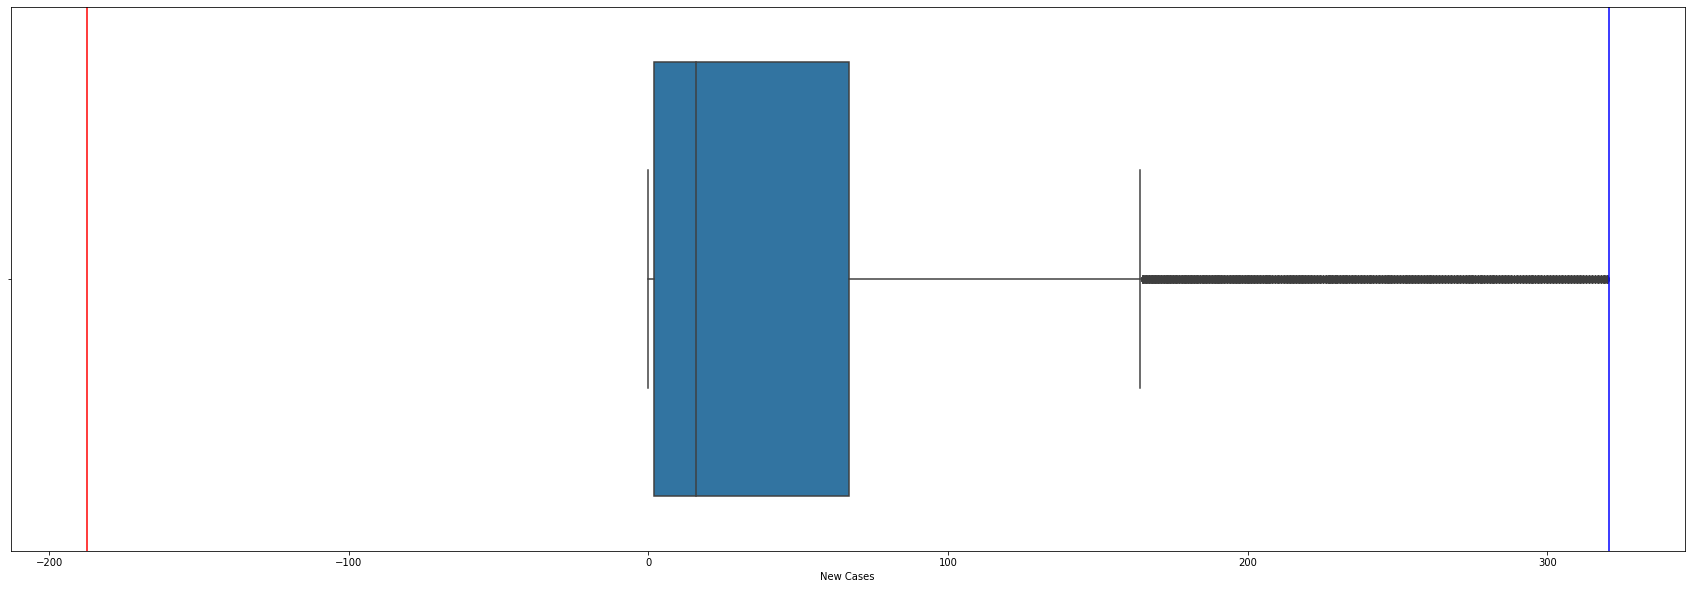

In [9]:
df_f = data[(data['New Cases']>= Q1-(1.5*IQR)) & (data['New Cases'] <= Q3+(1.5*IQR))]
# data.keys()

fig, ax = plt.subplots(figsize = (30, 10))
sns.boxplot(data = df_f, x ='New Cases')
plt.axvline(Q3+(1.5*IQR), color="blue",label="Lim. Superior")
plt.axvline(Q1-(1.5*IQR), color="red",label="Lim. Inferior")

In [10]:
print("coeficiente de asimetría ", df_f['New Cases'].skew( ))

coeficiente de asimetría  1.8879717405542904


In [12]:
print("coeficiente de curtosis ",df_f['New Cases'].kurtosis())

coeficiente de curtosis  3.0187888125822977


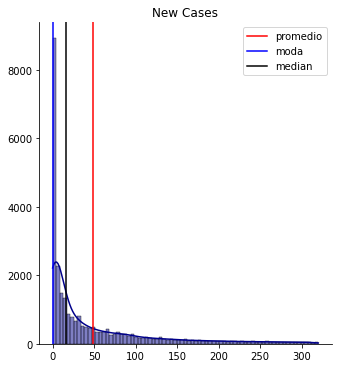

In [13]:
sns.displot(df_f['New Cases'].values, color='darkblue', kde=True)
plt.title('New Cases')
plt.xlabel('')
plt.ylabel('')
plt.axvline(df_f['New Cases'].mean(), color = 'red', label = 'promedio')
plt.axvline(df_f['New Cases'].mode()[0], color = 'blue', label = 'moda')
plt.axvline(df_f['New Cases'].median(), color = 'black', label = 'median')
plt.legend()
plt.show()

320.5


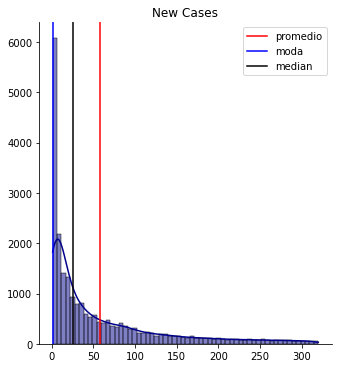

In [16]:
limite_superior =  Q3 + (1.5*IQR)
print(limite_superior)
df_df2 = df_f[(df_f['New Cases']>min(df_f['New Cases'])) & (df_f['New Cases']<limite_superior)]
sns.displot(df_df2['New Cases'].values, color='darkblue', kde=True)
plt.title('New Cases')
plt.xlabel('')
plt.ylabel('')
plt.axvline(df_df2['New Cases'].mean(), color = 'red', label = 'promedio')
plt.axvline(df_df2['New Cases'].mode()[0], color = 'blue', label = 'moda')
plt.axvline(df_df2['New Cases'].median(), color = 'black', label = 'median')
plt.legend()
plt.show()

In [7]:
df_p = data

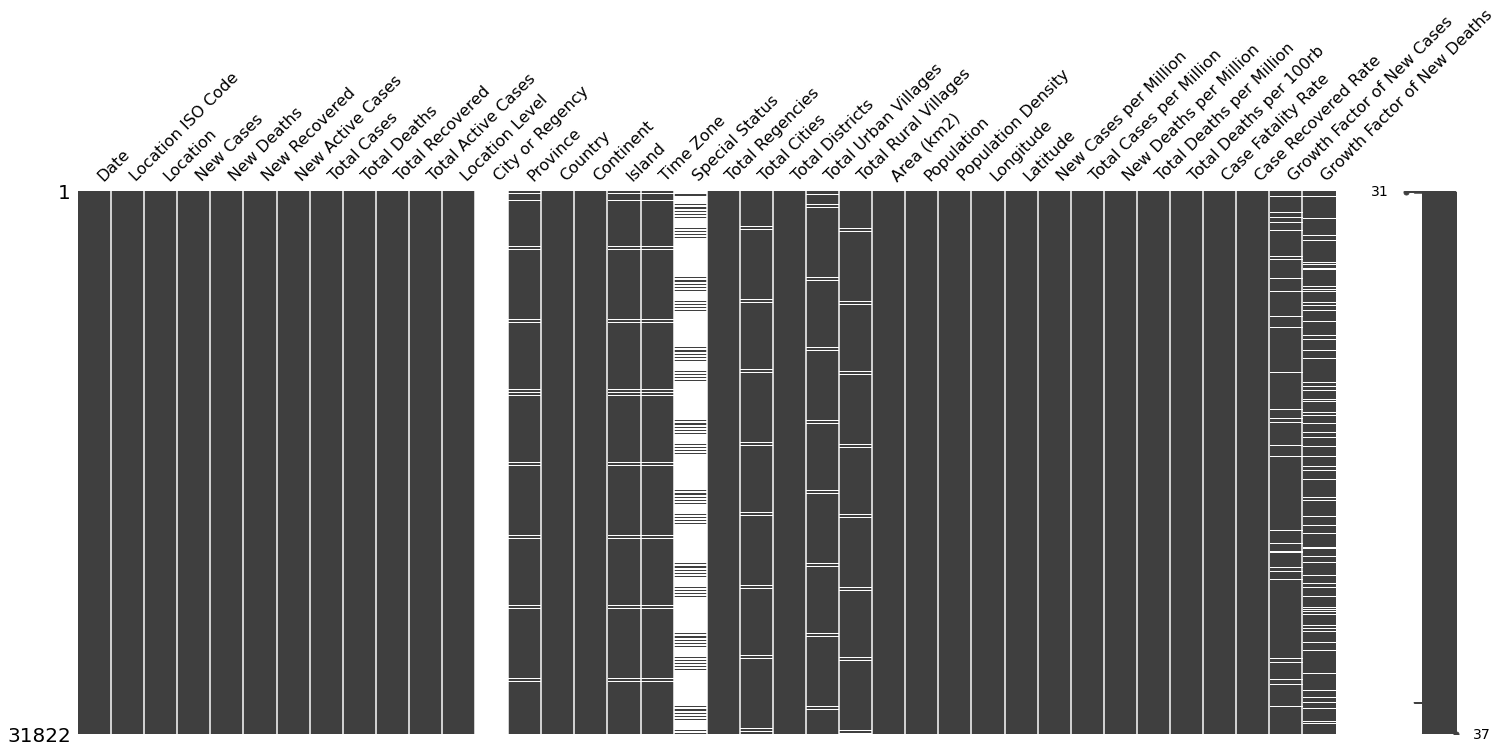

In [10]:
msg.matrix(df_p)

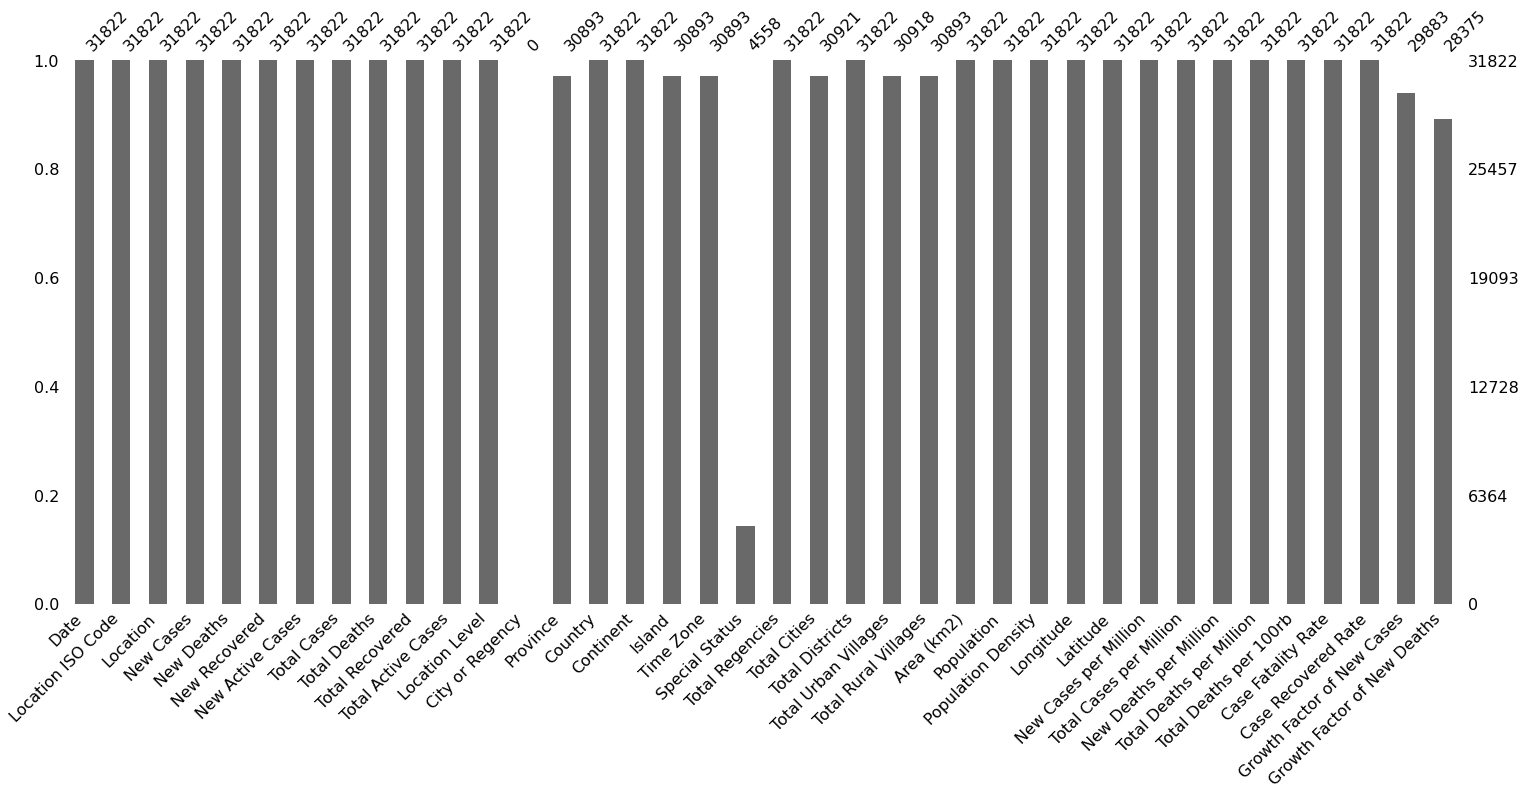

In [11]:
msg.bar(df_p)

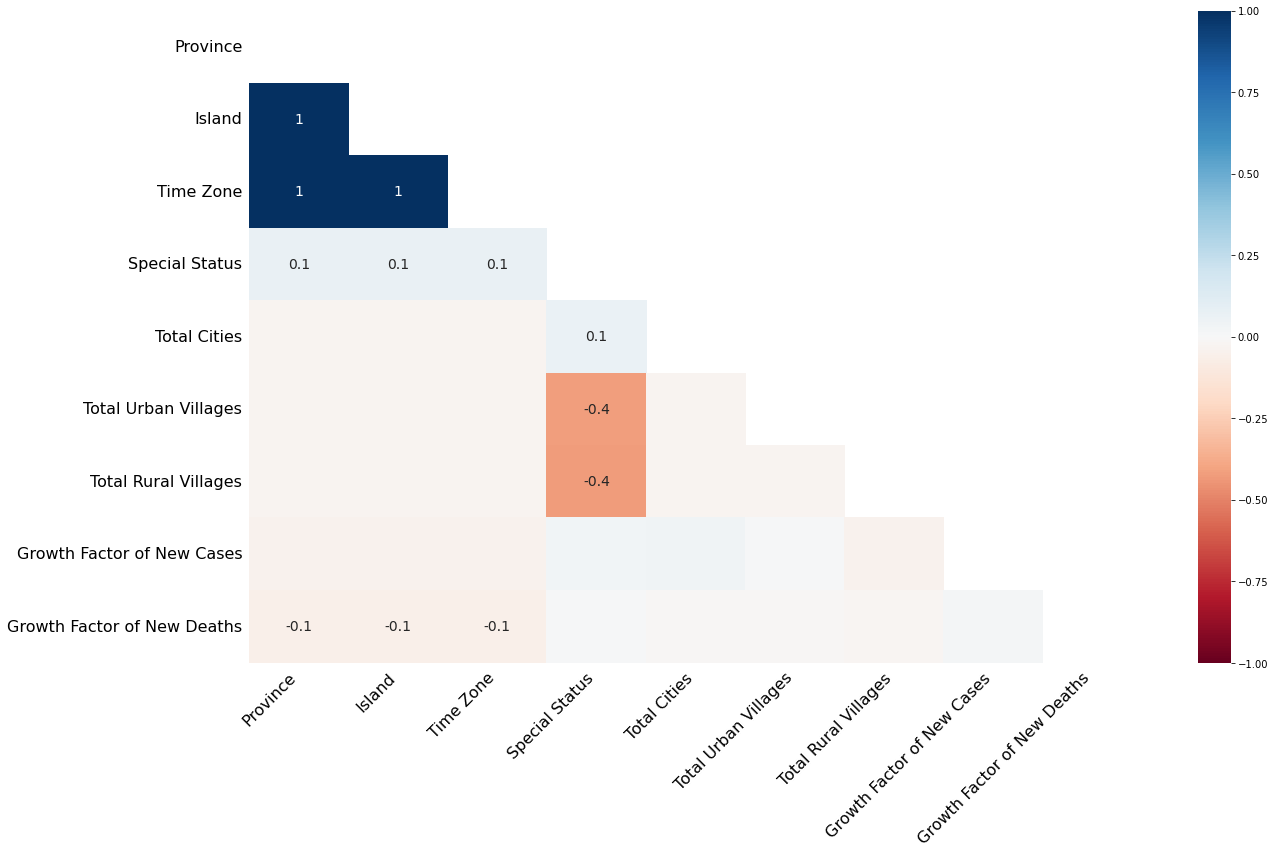

In [12]:
msg.heatmap(df_p)